In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sympy
import itertools
import collections

num = 10000
dice_faces = 9

def roll_dice_twice(dice_faces, num):
    return np.random.randint(1, dice_faces + 1, size=(2, num))

x = roll_dice_twice(dice_faces, num)

for i in range(num):
    print(f'第{i+1}次模拟: 第一次投掷点数 : {x[0][i]}, 第二次投掷点数 : {x[1][i]}')

第1次模拟: 第一次投掷点数 : 8, 第二次投掷点数 : 8
第2次模拟: 第一次投掷点数 : 2, 第二次投掷点数 : 6
第3次模拟: 第一次投掷点数 : 3, 第二次投掷点数 : 3
第4次模拟: 第一次投掷点数 : 7, 第二次投掷点数 : 4
第5次模拟: 第一次投掷点数 : 1, 第二次投掷点数 : 5
第6次模拟: 第一次投掷点数 : 9, 第二次投掷点数 : 8
第7次模拟: 第一次投掷点数 : 5, 第二次投掷点数 : 3
第8次模拟: 第一次投掷点数 : 8, 第二次投掷点数 : 9
第9次模拟: 第一次投掷点数 : 8, 第二次投掷点数 : 5
第10次模拟: 第一次投掷点数 : 4, 第二次投掷点数 : 6
第11次模拟: 第一次投掷点数 : 5, 第二次投掷点数 : 5
第12次模拟: 第一次投掷点数 : 4, 第二次投掷点数 : 8
第13次模拟: 第一次投掷点数 : 2, 第二次投掷点数 : 4
第14次模拟: 第一次投掷点数 : 3, 第二次投掷点数 : 5
第15次模拟: 第一次投掷点数 : 3, 第二次投掷点数 : 4
第16次模拟: 第一次投掷点数 : 3, 第二次投掷点数 : 4
第17次模拟: 第一次投掷点数 : 4, 第二次投掷点数 : 1
第18次模拟: 第一次投掷点数 : 5, 第二次投掷点数 : 9
第19次模拟: 第一次投掷点数 : 7, 第二次投掷点数 : 3
第20次模拟: 第一次投掷点数 : 2, 第二次投掷点数 : 2
第21次模拟: 第一次投掷点数 : 8, 第二次投掷点数 : 1
第22次模拟: 第一次投掷点数 : 9, 第二次投掷点数 : 8
第23次模拟: 第一次投掷点数 : 1, 第二次投掷点数 : 3
第24次模拟: 第一次投掷点数 : 6, 第二次投掷点数 : 6
第25次模拟: 第一次投掷点数 : 1, 第二次投掷点数 : 8
第26次模拟: 第一次投掷点数 : 2, 第二次投掷点数 : 4
第27次模拟: 第一次投掷点数 : 4, 第二次投掷点数 : 9
第28次模拟: 第一次投掷点数 : 8, 第二次投掷点数 : 7
第29次模拟: 第一次投掷点数 : 8, 第二次投掷点数 : 2
第30次模拟: 第一次投掷点数 : 1, 第二次投掷点数 : 1
第31次模拟: 第一次投掷点数 : 4

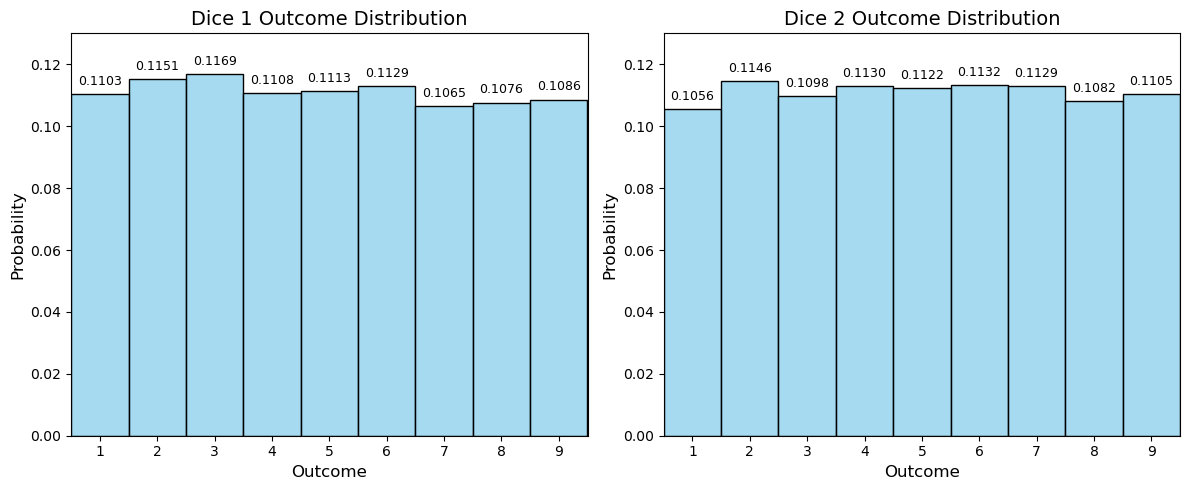

In [6]:
f, axs = plt.subplots(1, 2, figsize=(12, 5))

bins = np.arange(0.5, dice_faces + 1.5, 1)

for i in range(2):
    sns.histplot(x[i], stat='probability', bins=bins, ax=axs[i], color='skyblue', edgecolor='black')
    
    axs[i].set_xticks(range(1, dice_faces + 1))
    axs[i].set_xlim(0.5, dice_faces + 0.5)
    axs[i].set_ylim(0, 0.13) 
    
    axs[i].set_title(f'Dice {i+1} Outcome Distribution', fontsize=14)
    axs[i].set_xlabel('Outcome', fontsize=12)
    axs[i].set_ylabel('Probability', fontsize=12)
    
    for patch in axs[i].patches:
        height = patch.get_height()
        if height > 0:
            axs[i].text(
                patch.get_x() + patch.get_width() / 2,
                height + 0.002,
                f'{height:.4f}',
                ha='center', va='bottom', fontsize=9
            )

plt.tight_layout()
plt.show()


In [7]:
d = np.arange(1, dice_faces + 1)
all_outcomes = list(itertools.product(d,d))
sums = [a + b for a, b in all_outcomes]

counted_sums = collections.Counter(sums)
sum_values = sorted(counted_sums.keys())
sum_numbers = [counted_sums[sv] for sv in sum_values]
total_outcomes = dice_faces * dice_faces
probabilities_float = [c / total_outcomes for c in sum_numbers]
probabilities_exact = [sympy.Rational(c, total_outcomes) for c in sum_numbers]

count_practical = collections.Counter(x[0] + x[1])
practical_probabilities = [count_practical[sv] / num for sv in sum_values]

data = {
    'Sum': sum_values,
    'Theoretical Probability (exact)': probabilities_exact,
    'Theoretical Probability (float)': probabilities_float,
    'Practical Probability': practical_probabilities

}

df = pd.DataFrame(data)
df

,Sum,Theoretical Probability (exact),Theoretical Probability (float),Practical Probability
0,2,1/81,0.012346,0.0114
1,3,2/81,0.024691,0.0258
2,4,1/27,0.037037,0.0389
3,5,4/81,0.049383,0.0475
4,6,5/81,0.061728,0.0608
5,7,2/27,0.074074,0.0769
6,8,7/81,0.086420,0.0881
7,9,8/81,0.098765,0.0991
8,10,1/9,0.111111,0.1130
9,11,8/81,0.098765,0.1003


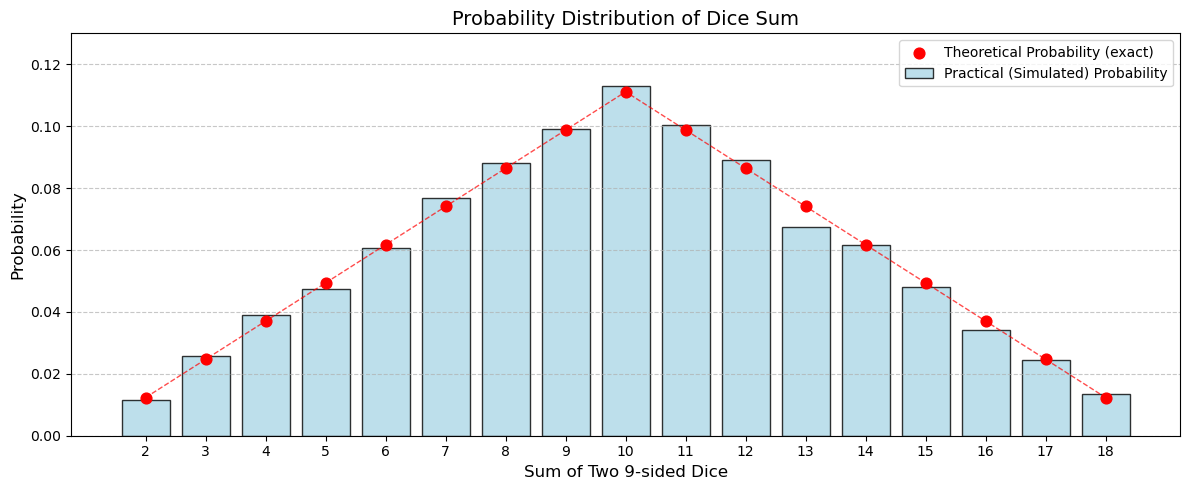

In [8]:
plt.figure(figsize=(12, 5))

bars = plt.bar(
    df['Sum'],
    df['Practical Probability'],
    width=0.8,
    color='lightblue',
    edgecolor='black',
    alpha=0.8,
    label='Practical (Simulated) Probability'
)

plt.scatter(
    df['Sum'],
    df['Theoretical Probability (exact)'],
    color='red',
    s=60,
    zorder=5,
    label='Theoretical Probability (exact)',
    marker='o'
)

plt.plot(
    df['Sum'],
    df['Theoretical Probability (exact)'],
    color='red',
    linestyle='--',
    linewidth=1,
    alpha=0.7
)

plt.xlabel('Sum of Two 9-sided Dice', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title('Probability Distribution of Dice Sum', fontsize=14)

plt.xticks(range(2, 19))

plt.ylim(0, 0.13)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()